# Transform Coding

## Contents

1. [Insights](#insights).
2. [Basic coding steps](#coding_steps).
3. [Transform (theory)](#transform_theory).
4. [A color transform (RGB/YUV)](#color_transform).
6. [DCT (Discrete Cosine Transform)](#DCT).
7. [DWT (Discrete Wavelet Transform)](#DWT).
8. [Bit-planes progression](#bitplanes_progression).
9. [Code-stream orderings and scalabilities](#scalabilities).

## Insights<a id='insights'></a>

* Signals can be represented at least in two different domains: the signal domain (for example, time in the case of sound of space in the case of image) and the frequency domain.
* Transform coding is based on the idea that, in the frequency domain, most of the energy of the signal can be compacted in a small number of transform coefficients.
* This property can be interesting for increasing the coding efficiency.

## Basic coding steps<a id='coding_steps'></a>

### Encoder

1. Split $s$ into blocks of $B$ samples, if required.
2. Transform each block.
3. Performs a bit-allocation procedure over the coefficientes.
4. Lossless encode the quantized coefficients.

### Decoder

1. Decode the coefficients of each block.
2. "Dequantize" the coefficients of each block.
3. Inverse-transform each block.
4. Join the blocks, if required.

## Splitting

1. Divide $s=\{s_n\}_{n=0}^{N-1}$ into blocks $\{s_n\}_{n=0}^{B-1}$ of $B$ samples.

## Transform (some theory)<a id='transform_theory'></a>

* In the forward transform the samples of the block are correlated with (the block is compared to) a set of basis functions

  \begin{equation}
    \{S_k\}_{u=0}^{B-1} = \sum_{n=0}^{B-1}a_{u,n}s_n.
    \tag{forward_transform}
  \end{equation}

* The backward (inverse) transform restores the original samples

  \begin{equation}
    \{s_n\}_{n=0}^{B-1} = \sum_{u=0}^{B-1}b_{n,u}S_k.
    \tag{inverse_transform}
  \end{equation}
  
* These equations can be written in matrix form as
  
  \begin{equation}
    S=As
    \tag{forward_transform_matrix_form}
  \end{equation}
  
  \begin{equation}
    s=BS,
    \tag{inverse_transform_matrix_form}
  \end{equation}
  
  where $A$ and $B$ are matrices, being
  
  \begin{equation}
    \begin{array}{l}
    [A]_{u,n} = a_{u,n} \\
    [B]_{n,u} = b_{n,u}.
    \end{array}
  \end{equation}
  
* In transform coding, $A$ and $B$ must be inverses of each other ($B=A^{-1}$), i.e.

  \begin{equation}
    AB = BA = I,
  \end{equation}
  
  where $I$ is the identity matrix.

## A color transform<a id='color_transform'></a>

###  Luminance and chrominance<a id='color_transform'></a>

* [Chrominance](https://en.wikipedia.org/wiki/Chrominance) (or chroma) is the signal used in video systems to convey the color information of the picture or a video. It was defined to add the color signal to the black and white one in analog TV. Thus, the same signal, composed by two different subsignals: Y and UV that can be isolated by filtering, was compatible with both, black and white (which only used Y) and color ones (that used [YUV](https://en.wikipedia.org/wiki/YUV)).

\begin{equation}
    \left(
      \begin{array}{c}
        \text{Y}\\
        \text{U}\\
        \text{V}
      \end{array}
    \right) =
    \left(
      \begin{array}{rrr}
          0,299 & 0,587 & 0,144 \\
          -0.14713 & -0.28886 &  0.436 \\
          0.615   & -0.51499 & -0.10001
      \end{array}
    \right)
    \left(
      \begin{array}{c}
        \text{R}\\
        \text{G}\\
        \text{B}
      \end{array}
    \right)
\end{equation}

\begin{equation}
    \left(
      \begin{array}{c}
        \text{R}\\
        \text{G}\\
        \text{B}
      \end{array}
    \right) =
    \left(
      \begin{array}{rrr}
          1 &  0       &  1.13983 \\
          1 & -0.39465 & -0.58060 \\
          1 &  2.03211 &  0
      \end{array}
    \right)
    \left(
      \begin{array}{c}
        \text{Y}\\
        \text{U}\\
        \text{V}
      \end{array}
    \right)
\end{equation}

* Later, in digital video, the YUV color domain was called the [YCrCb color domain](https://en.wikipedia.org/wiki/YCbCr).

* Used, for example, in [JPEG](https://en.wikipedia.org/wiki/JPEG).

### Spectral (color) redundancy<a id='color_redundancy'></a>

* [$\text{RGB}$ domain](https://en.wikipedia.org/wiki/RGB_color_model) is more redundant than the [$\text{YUV}$ domain](https://en.wikipedia.org/wiki/YUV):

In [ ]:
!if [ ! -f color_subsampling.svg ]; then \
  wget http://www.hpca.ual.es/~vruiz/images/san-diego.png; \
fi

<img src="san-diego.png">

In [ ]:
# pip install imageio scipy numpy
import imageio
from scipy.stats import entropy
import numpy as np

In [ ]:
RGB = imageio.imread('san-diego.png')

In [ ]:
RGB

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(24,16))
plt.imshow(RGB)
plt.show()

In [ ]:
R = RGB.copy()
R[:,:,1] = 0
R[:,:,2] = 0
G = RGB.copy()
G[:,:,0] = 0
G[:,:,2] = 0
B = RGB.copy()
B[:,:,0] = 0
B[:,:,1] = 0

In [ ]:
R

In [ ]:
G

In [ ]:
B

In [ ]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1) # Rows, cols, subfigure
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
R_histo = np.histogram(RGB[:,:,0], bins=256)[0]
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
R_entropy = entropy(R_histo, base=2)
a.set_title("entropy(R) = " + str(R_entropy))
imgplot = plt.imshow(R)

a = fig.add_subplot(1,3,2)
G_histo = np.histogram(RGB[:,:,1], bins=256)[0]
G_entropy = entropy(G_histo, base=2)
a.set_title("entropy(G) = " + str(G_entropy))
imgplot = plt.imshow(G)

a = fig.add_subplot(1,3,3)
B_histo = np.histogram(RGB[:,:,2], bins=256)[0]
B_entropy = entropy(B_histo, base=2)
a.set_title("entropy(B) = " + str(B_entropy))
imgplot = plt.imshow(B)
plt.show()

# See https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

In [ ]:
print('Total entropy = {} bits/pixel'.format(R_entropy + G_entropy + B_entropy))

In [ ]:
# pip install opencv-python
import cv2
components = ('r','g','b')
histr = [None for col in components]
for i,com in enumerate(components):
    # https://docs.opencv.org/3.4.0/d1/db7/tutorial_py_histogram_begins.html
    histr[i] = cv2.calcHist([RGB], [i], None, [256], [0,256])
    plt.plot(histr[i], color = com)
plt.xlim([0,256])
plt.ylim([0,10000])
plt.show()

In [ ]:
# https://stackoverflow.com/questions/43983265/rgb-to-yuv-conversion-and-accessing-y-u-and-v-channels
import cv2
import numpy as np

In [ ]:
def make_lut_u():
    return np.array([[[i,255-i,0] for i in range(256)]], dtype=np.uint8)

def make_lut_v():
    return np.array([[[0,255-i,i] for i in range(256)]], dtype=np.uint8)

In [ ]:
lut_U, lut_V = make_lut_u(), make_lut_v()

In [ ]:
lut_U

In [ ]:
lut_V

In [ ]:
# https://docs.opencv.org/3.4.0/df/d9d/tutorial_py_colorspaces.html
YUV = cv2.cvtColor(RGB, cv2.COLOR_RGB2YUV)

In [ ]:
# https://docs.opencv.org/3.4.0/d3/df2/tutorial_py_basic_ops.html
Y, U, V = cv2.split(YUV)

In [ ]:
Y = cv2.cvtColor(Y, cv2.COLOR_GRAY2RGB)
U = cv2.cvtColor(U, cv2.COLOR_GRAY2RGB)
V = cv2.cvtColor(V, cv2.COLOR_GRAY2RGB)

In [ ]:
# Define color palette for U_mapped and V_mapped
# https://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html#lut
U_mapped = cv2.LUT(U, lut_U)
V_mapped = cv2.LUT(V, lut_V)

In [ ]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1) # Rows, cols, subfigure
Y_histo = np.histogram(Y, bins=256)[0]
Y_entropy = entropy(Y_histo, base=2)
a.set_title("entropy(Y) = " + str(Y_entropy))
imgplot = plt.imshow(Y)

a = fig.add_subplot(1,3,2)
U_histo = np.histogram(U, bins=256)[0]
U_entropy = entropy(U_histo, base=2)
a.set_title("entropy(U) = " + str(U_entropy))
imgplot = plt.imshow(U_mapped)

a = fig.add_subplot(1,3,3)
V_histo = np.histogram(V, bins=256)[0]
V_entropy = entropy(V_histo, base=2)
a.set_title("entropy(V) = " + str(V_entropy))
imgplot = plt.imshow(V_mapped)

plt.show()

In [ ]:
print('Total entropy = {} bits/pixel'.format(Y_entropy + U_entropy + V_entropy))

In [ ]:
histr = [None for com in components]
for i,com in enumerate(components):
    histr[i] = cv2.calcHist([YUV],[i],None,[256],[0,256])
    plt.plot(histr[i], color = com)
plt.xlim([0,256])
plt.show()

### Chrominance subsampling<a id='chroma_subsamplig'></a>

[The human visual system is more sensitive to the luma (Y) than to the chroma (UV)](https://en.wikipedia.org/wiki/Chroma_subsampling). This means than the chroma can be subsampled without a signiﬁcant loss of quality in the images.

<img src="figs/color_subsampling.svg" width=600>

In [ ]:
# pip install PyWavelets
import pywt

In [ ]:
def subsample_chroma(image, levels):
    subsampled = np.ndarray((image.shape[0], image.shape[1], 3), 'uint8')
    
    # Luma
    subsampled[:,:,0] = image[:,:,0] # Copy only first component

    # Chroma Cb
    DWT_coeffs = pywt.wavedec2(image[:,:,1], 'bior3.5', level=levels)
    for i in range(levels-1):
        DWT_coeffs[i+1][0][:,:] = 0.0 # "Delete" LH subbands
        DWT_coeffs[i+1][1][:,:] = 0.0 # "Delete" HL subbands
        DWT_coeffs[i+1][2][:,:] = 0.0 # "Delete" HH subbands

    subsampled[:,:,1] = pywt.waverec2(DWT_coeffs, 'bior3.5')
                  
    # Chroma Cb
    DWT_coeffs = pywt.wavedec2(image[:,:,2], 'bior3.5', level=levels)
    for i in range(levels-1):
        DWT_coeffs[i+1][0][:,:] = 0.0 # "Delete" LH subbands
        DWT_coeffs[i+1][1][:,:] = 0.0 # "Delete" HL subbands
        DWT_coeffs[i+1][2][:,:] = 0.0 # "Delete" HH subbands
    subsampled[:,:,2] = pywt.waverec2(DWT_coeffs, 'bior3.5')

    return (subsampled, (subsampled.shape[0], subsampled.shape[1]), DWT_coeffs[0].shape)

In [ ]:
chroma_subsampled_YUV, luma_shape, chroma_shape = subsample_chroma(YUV, 5)
print("Luma shape =", luma_shape, "pixels\nChroma shape =", chroma_shape, "coefficients")

In [ ]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1) # Rows, cols, subfigure
a.set_title("Y")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,0], cmap='gray')

a = fig.add_subplot(1,3,2)
a.set_title("U (480:1)")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,1], cmap='gray')

a = fig.add_subplot(1,3,3)
a.set_title("V (480:1)")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,2], cmap='gray')

plt.show()
#plt.imshow(chroma_subsampled_YUV[:,:,1], cmap='gray' # Shows U
#plt.show()

In [ ]:
chroma_subsampled_RGB = cv2.cvtColor(chroma_subsampled_YUV, cv2.COLOR_YUV2RGB)

In [ ]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,2,1) # Rows, cols, subfigure
a.set_title("Original")
plt.imshow(RGB)

a = fig.add_subplot(1,2,2) # Rows, cols, subfigure
a.set_title("Chroma subsampled (3:1)")
plt.imshow(chroma_subsampled_RGB)

plt.show()

In [ ]:
print("The original image uses ", \
      luma_shape[0]*luma_shape[1] * 3,
      "bytes"
     )
print("The subsampled image uses", \
      luma_shape[0]*luma_shape[1] +
      chroma_shape[0]*chroma_shape[1] * 2,
      "bytes"
     )

## Orthogonal transform

* The rows of $A$ ($a_{k,*}$) are refered to as the *basis vectors* of the transform, and form an *orthogonal* basis set. The rows can be also seen as the coefficients of $B$ filters, being the first one ($i=0$) the "low-pass" one, which will produce the DC coefficient, and the rest ($i\geq 1$) the "high-pass" filters,  which will generate the AC (Alternating Current) coeffs. These $B$ filters form a filter-bank where the overlapping between the frequency response of the filters should be as small as possible if we want maximum energy compaction.

## Orthonormal transform

* If the basis vectors of a orthogonal transform are unit vectors, the transform is said orthonoral.

* For orthonormal transforms, it holds that

  \begin{equation}
    A^{-1} = A^T.
  \end{equation}

  Therefore, the pair of transforms can be written as
  
  \begin{equation}
    \begin{array}{l}
      S=As \\
      s=A^TS.
    \end{array}
  \end{equation}

## Unitary transform

* Orthonormal transforms are energy preserving and therefore, unitary:

  \begin{equation}
    \sum_{u=0}^{B-1} S_u^2 = \sum_{n=0}^{B-1}s_n^2.
  \end{equation}
  
### Proof

\begin{equation}
  \sum_{u=0}^{B-1} S_u^2 = S^TS = (As)^TAs = s^TA^TAs = s^TIs = s^Ts = \sum_{n=0}^{B-1}s_n^2.
\end{equation}

## Coding gain

* The coding gain measures the compaction level of the transform, which is defined as

  \begin{equation}
    G=\frac{\frac{1}{B}\displaystyle\sum_{u=0}^{B-1}\sigma_{S_u}^2}{\sqrt[B]{\displaystyle\prod_{u=0}^{B-1}\sigma_{S_u}^2}},
  \end{equation}
  
  where $\sigma_{S_u}^2$ is the variance of coeff $S_u$.

## Karhunen-Loéve transform (KLT)

* For the KLT, the rows of $A$ (the basis of the forward transform) are the eigenvectors of the autorrelation matrix $R$ of the signal $s$. The $(i,j)$-th element of $R$ is defined as:

  \begin{equation}
    R_{i,j} = \text{E}\big(s_ns_{n+|i-j|}\big).
  \end{equation}
  
* It can be proven that KLT minimizes $\sqrt[B]{\prod_{u=0}^{B-1}\sigma_{S_u}^2}$, and therefore, it provides the maximum coding gain. Unfortunately, the basis fuctions of the KLT depends on $s$ if it is non-[stationary](https://en.wikipedia.org/wiki/Stationary_process) and in this case, the autocorrelation matrix (or the basis) must be sent to the decoder (to run the inverse transform) as side information. However, if $B=2$, the KLT is

  \begin{equation}
    A_{\text{2-KLT}} = \frac{1}{\sqrt{2}}
    \left[
      \begin{array}{cc}
        1 & 1 \\
        1 & -1
      \end{array}
    \right]
  \end{equation}
  
  for all signals.

## DCT (Discrete Cosine Transform)<a id='DCT'></a>

### Definition

* The forward (direct) transform is

  \begin{equation}
    S_u = \frac{\sqrt{2}}{\sqrt{N}}
    K(u)\sum_{n=0}^{N-1} s_n\cos\frac{(2n+1)\pi u}{2n},
  \end{equation}

  and the backward (inverse) transform is

  \begin{equation}
    s_n = \frac{\sqrt{2}}{\sqrt{N}}
    \sum_{u=0}^{N-1} K(u)S_u\cos\frac{(2n+1)\pi u}{2n},
  \end{equation}

  where $N$ is the number of pixels, and $s_n$ denotes the $n$-th pixel
  of the image $s$, and

  \begin{equation}
    K(u) =
    \left\{
      \begin{array}{ll}
      \frac{1}{\sqrt{2}} & \text{si}~u=0\\
        1 & \text{if}~u>0.
      \end{array}
      \right.
  \end{equation}

### Properties

1. **Separable**: the $D$-dimensional DCT can be computed using the $1$D DCT in each possible dimension.
2. In general, **high energy compaction**: a small number of DCT coefficients can reconstruct with a reasonable accuracy the original signal.
3. **Unitary**: the energy of the DCT coefficients is proportional to the energy of the samples.
4. **Orthonormality**: DCT basis are orthonormal (orthogonal + unitary) and therefore, DCT coefficients are uncorrelated.

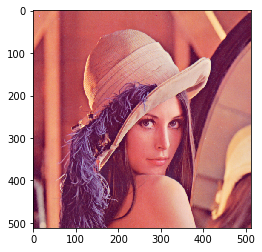

In [1]:
# Load lena

import urllib.request
from matplotlib import pyplot as plt
import numpy as np
import cv2

%matplotlib inline
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BRG = cv2.imdecode(arr,-1)
RGB = cv2.cvtColor(BRG, cv2.COLOR_BGR2RGB)
plt.imshow(RGB)

In [2]:
from scipy import fftpack

# Forward and backward DCT wrappers

def forward_2d_dct(img):
    """ Get 2D Cosine Transform of Image
    """
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T
    # https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.fftpack.dct.html
    return fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')

def inverse_2d_dct(coefficients):
    """ Get 2D Inverse Cosine Transform of Image
    """
    # https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.fftpack.idct.html
    return fftpack.idct(fftpack.idct(coefficients.T, norm='ortho').T, norm='ortho')

In [3]:
# Color 2D-DCT is the 2D-DCT of each component
components = ('r','g','b')
dct = [None]*3
for i,com in enumerate(components):
    print("{} ".format(i), end='')
    dct[i] = forward_2d_dct(RGB[:,:,i])

0 1 2 

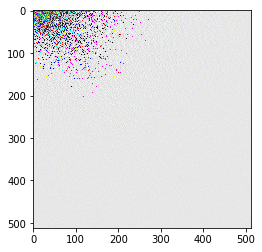

In [4]:
# View DCT coefs
view_dct = np.empty(RGB.shape)
for i,com in enumerate(components):
    view_dct[:,:,i] = dct[i][:,:]
plt.imshow((view_dct - view_dct.min())/(view_dct.max() - view_dct.min())*255)

100 coefficients

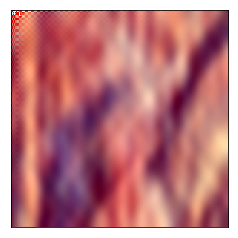

200 coefficients

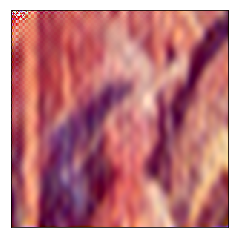

300 coefficients

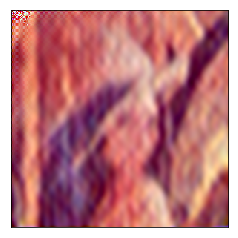

400 coefficients

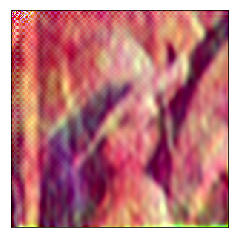

500 coefficients

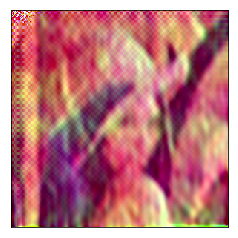

600 coefficients

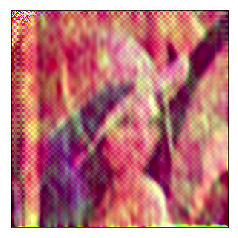

700 coefficients

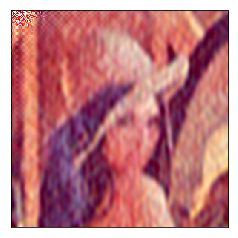

800 coefficients

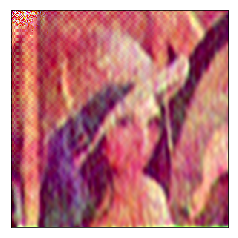

900 coefficients

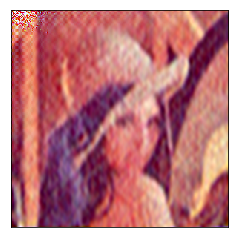

1000 coefficients

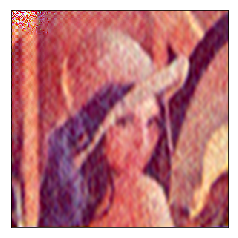

1100 coefficients

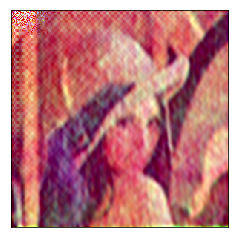

1200 coefficients

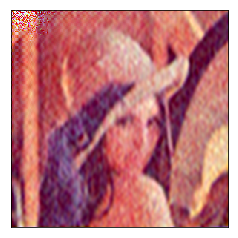

1300 coefficients

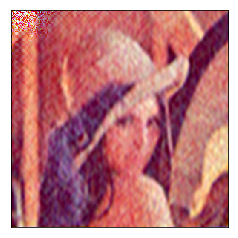

1400 coefficients

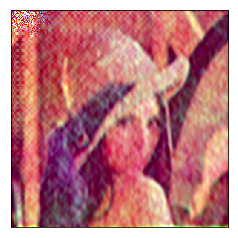

1500 coefficients

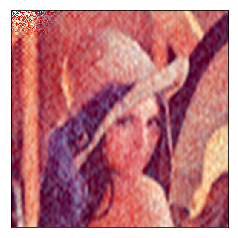

1600 coefficients

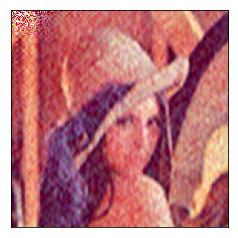

1700 coefficients

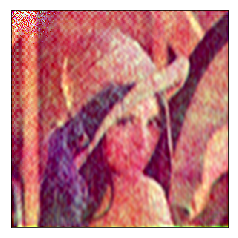

1800 coefficients

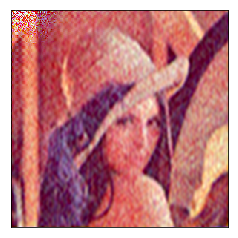

1900 coefficients

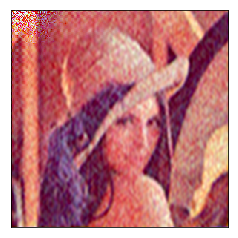

2000 coefficients

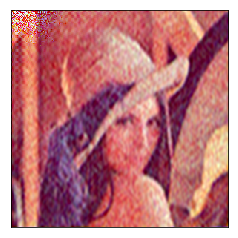

2100 coefficients

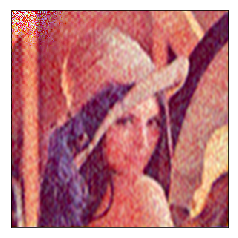

2200 coefficients

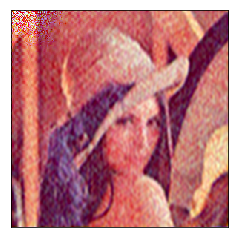

2300 coefficients

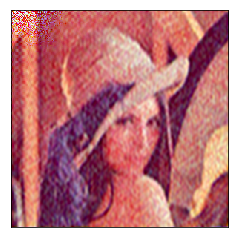

2400 coefficients

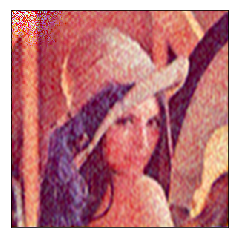

2500 coefficients

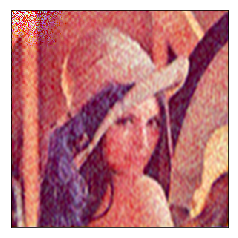

2600 coefficients

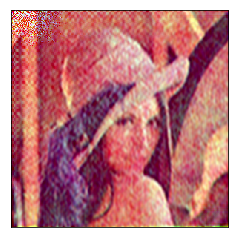

2700 coefficients

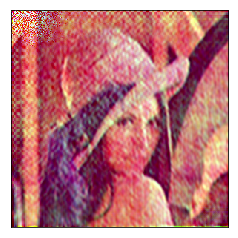

2800 coefficients

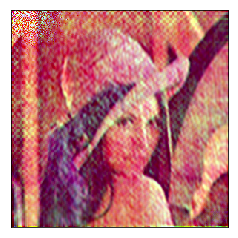

2900 coefficients

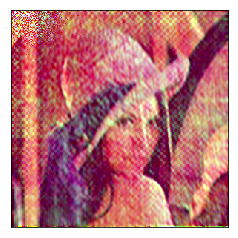

3000 coefficients

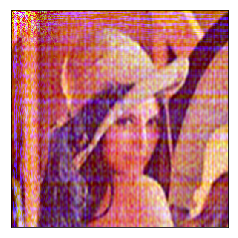

3100 coefficients

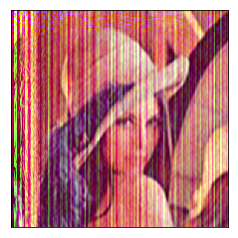

3200 coefficients

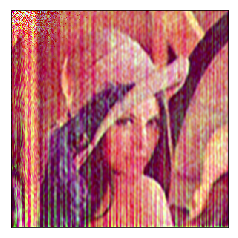

In [5]:
# Reconstruct with biggest DCT coefs
N = 100 # Step size (in coeffs) for each reconstruction
for k in range(32): # Up to 32 reconstructions
    
    coeffs_indexes = np.empty((RGB.shape[0] * RGB.shape[1]), dtype='float, int, int')
    for i in range(RGB.shape[0]):
        for j in range(RGB.shape[1]):
            coeffs_indexes[i*RGB.shape[1]+j] = (np.abs(dct[0][i][j]), i, j)
    
    # https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.sort.html
    sorted = np.sort(coeffs_indexes, axis = -1)[::-1]
    
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html
    x_coords = np.empty((k+1)*N, dtype='int')
    y_coords = np.empty((k+1)*N, dtype='int')
    for kk in range((k+1)*N):
        x_coords[kk] = sorted[kk][1]
        y_coords[kk] = sorted[kk][2]

    recons = np.empty(RGB.shape)
    
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html
    dct_copy = np.zeros(dct[0].shape)

    dct_copy[x_coords, y_coords] = dct[0][x_coords, y_coords]
    recons_ = inverse_2d_dct(dct_copy)
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.clip.html
    recons[:,:,0] = recons_[:,:].clip(0,255)
    
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty_like.html
    dct_copy = np.empty_like(dct[1])
    dct_copy[x_coords, y_coords] = dct[1][x_coords, y_coords]
    recons_ = inverse_2d_dct(dct_copy)
    recons[:,:,1] = recons_[:,:].clip(0,255)

    dct_copy = np.empty_like(dct[2])
    dct_copy[x_coords, y_coords] = dct[2][x_coords, y_coords]
    recons_ = inverse_2d_dct(dct_copy)
    recons[:,:,2] = recons_[:,:].clip(0,255)
    
    plt.imshow(recons.astype('uint8'))
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);
    print("{} coefficients".format((k+1)*N), end='')
    plt.show()


## $8\times 8$ DCT

* DCT exhibits a bad performance when applied to high resolution images, but locally it works pretty well. For this reason, most DCT-based image/video codecs divide the images in blocks (typically of 8x8 pixels) and apply the DCT to each block, independently. Let's see the basis functions (the synthesys filters's response to a Delta) of the 2D-DCT.

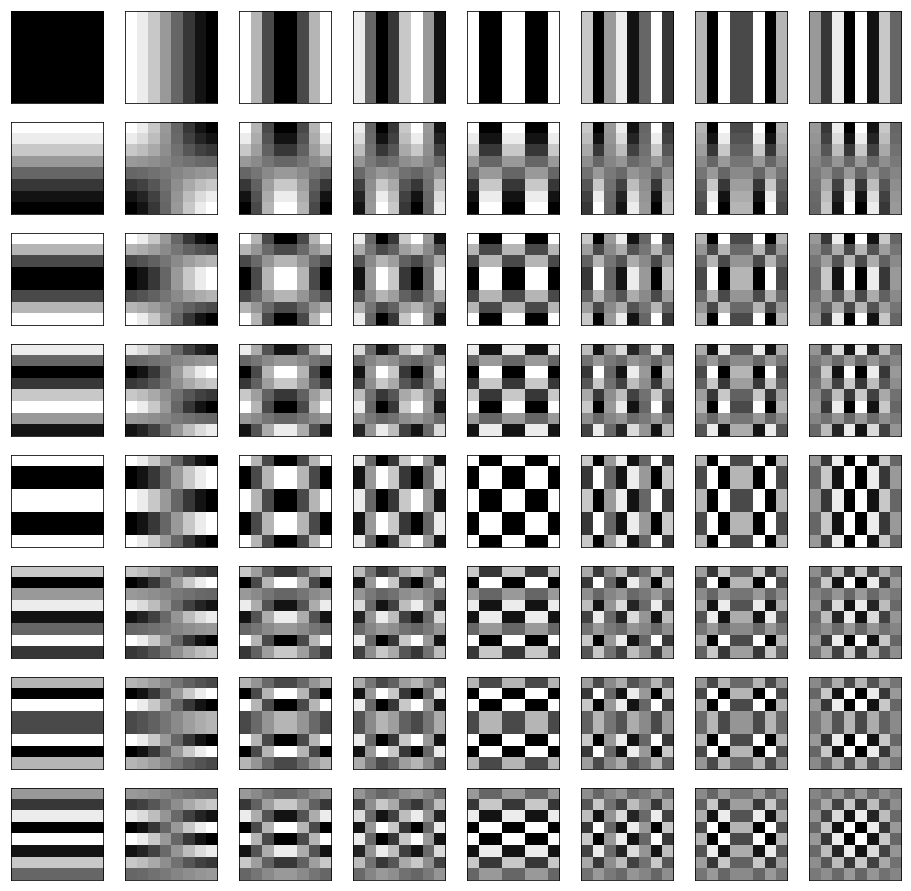

In [6]:
fig = plt.figure(figsize=(16, 16))
for i in range(8):
    for j in range(8):
        dct_copy = np.zeros((8, 8))

        dct_copy[i][j] = 1.0
        recons = inverse_2d_dct(dct_copy)
        
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255

        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

Now with more resolution:

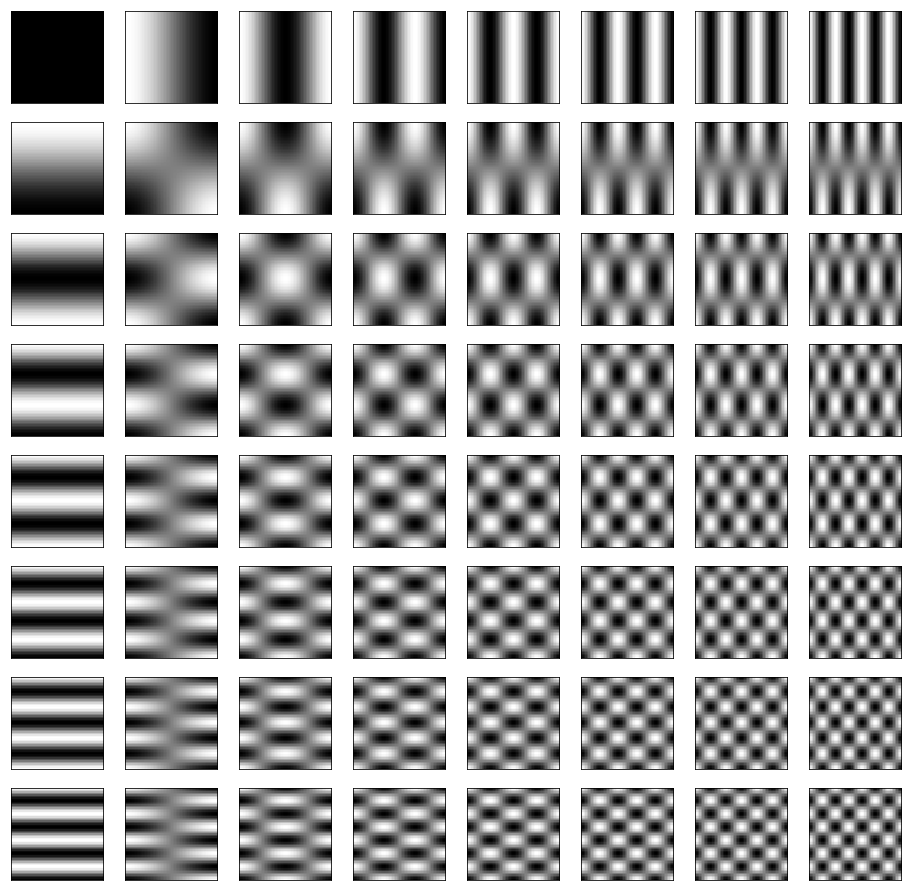

In [8]:
fig = plt.figure(figsize=(16, 16))
for i in range(8):
    for j in range(8):
        dct_copy = np.zeros((64, 64))

        dct_copy[i][j] = 1.0
        recons = inverse_2d_dct(dct_copy)
        
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255

        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

## Dyadic DWT (Discrete Wavelet Transform)<a id='DWT'></a>

Key features:

1. **High spectral compaction**, specially when transient signals are present.
2. **Multiresolution representation**: it is easy to recover a reduced version of the original image if only a sub-set of the coeﬃcients is proccesed.

### Filters bank implementation

<img src="figs/QMF.svg">

Where:
\begin{equation}
  s = (\uparrow^2(L)*{\text s}_L) + (\uparrow^2(H)*{\text s}_H)
\end{equation}
and
\begin{equation}
  \begin{array}{rcl}
    L & = & \downarrow^2(s*{\text a}_L) \\
    H & = & \downarrow^2(s*{\text a}_H).
  \end{array}
\end{equation}


Comments:

1. ${\text a}_L$ and ${\text a}_H$ are the transfer function (the transfer function of a filter is the response of that filter to the unitary impulse function (Dirac's delta))  of a low-pass filter and high-pass filter, respectively, that have been designed to be complementary (ideally, in $L$ we only found the frequencies of $s$ that are not in $H$, and viceversa). When this is true, it is said the we are using a perfect-reconstruction quadrature-mirror filter-bank and the DWT is *biorthogonal*.

2. In the wavelet theory, ${\text s}_L$ is named the *scale function* and ${\text s}_H$ the *mother function* or *wavelet basis function*. The coefficients of $L$ are also knwon as the *scale coeffients* and the coeffcientes of $H$ the *wavelet coefficients* [[Sovic & Sersic, 2012]](https://scholar.google.es/scholar?hl=en&as_sdt=0%2C5&q=Ana+Sovic+and+Damir+Sersic.+Signal+decomposition+methods+for+reducind+drawbacks+of+the+dwt&btnG=).

3. $\downarrow^2(\cdot)$ and $\uparrow^2(\cdot)$ donote the
  subsampling and oversampling operations:
  
  \begin{equation}
    (\downarrow^2(s))_i = s_{2i}
  \end{equation}
  
  and
  
  \begin{equation}
    (\uparrow^2(s))_i =
  \left\{
  \begin{array}{ll}
    s_{i/2} & \text{if $i$ if even} \\
    0 & \text{otherwise}.
  \end{array}
  \right.
  \end{equation}
  
  where $s_i$ if the $i$-th sample of $s$.
  
4. $*$ is the convolution operator.

5. Notice that half of the filtered samples are wasted.

### Lifting implementation [[Sweldens & Schröder, 2000)]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=building+wavelets+at+home&btnG=)

<img src="figs/lifting.svg">

Comments:

1.
\begin{equation}
  H_i = s_{2i+1} - {\cal P}(\{s_{2i}\})_i
  \tag{PredictionStep}
  \label{eq:PredictionStep}
\end{equation}

\begin{equation}
  L_i = s_{2i} + \{{\cal U}(H)\}_i
  \tag{UpdateStep}
  \label{eq:UpdateStep}
\end{equation}

2. Subsampled signals $\{s_{2i}\}$ and $\{s_{2i+1}\}$ can been computed by using

\begin{equation*}
   \{s_{2i+1}\} = \downarrow^2(Z^{-1}(s))
\end{equation*}

and

\begin{equation*}
   \{s_{2i}\} = \downarrow^2(s),
\end{equation*}

where $Z^{-1}$ represents the one sample delay function.

3. $H$ has tipically less energy and variance and entropy than $\{s_{2i+1}\}$.
4. $L$ has less aliasing than $\{s_{2i}\}$ (notice that $L$ has not
  been low-pass filtered before subsampling it).

### $T$-levels 1D-DWT

<img src="figs/n_levels_dwt1d.svg">

### 2D-DWT

* The one-dimensional (1D) DWT is a separable transform. Therefore, the 2D DWT can be computed applying the DWT to all the rows of an image and next, to all the columns, or viceversa.

<img src="figs/2D-DWT.svg">

* The contribution of a coefficient of a subband $b$ is determined by the DWT basis fuction ${s_H}^b$ asociated to that coefficient, which can be empirically determined by applying the inverse DWT to the Dirac Impulse function localized in that coefficient (notice that ${s_H}^b$ does not depend on the coefficient because we are supposing that all the coefficients of a subband have the same contribution, the same basis fuction) [[Rabbani, Joshi & Jones, 2009]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=Majid+Rabban%2C+Rajan+L.+Joshi%2C+and+Paul+W.+Jones.+The+JPEG+2000+Suite%2C+chapter+JPEG+2000+Core+Coding+System+%28Part+1%29.+WILEY%2C+2009&btnG=). Therefore, the  <a href="https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm">L$_2$-norm</a> for the subband $b$ is computed as the energy of a basis function of that subband as

\begin{equation}
  E({{\text s}_H}^b) = \sum_i{|{{\text s}_H}^b_i|}^2.
\end{equation}

In the case of the 5/3-DWT, the L$_2$-norms of the DWT subbands are:

<img src="figs/factores_5_3_L2_norm.svg">

### Haar filters [[Haar, 1910]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=A.+Haar.+Zur+Theorie+der+orthogolanen+Funktionen-Systeme.+Mathematische+Annalen%2C+69%3A331%E2%80%93371%2C+1910&btnG=)

The $i$-th sample of the low-frequency subband is computed (using a filter plus subsampling) as

\begin{equation}
  L_i=\frac{S_{2i}+S_{2i+1}}{2},
  \tag{HaarL}
  \label{eq:Haar_A-LPF}
\end{equation}

and the $i$-th sample of the high-frequency subband as

\begin{equation}
  H_i=S_{2i+1}-S_{2i}.
  \tag{HaarH}
  \label{eq:Haar_A-HPF}
\end{equation}

If Lifting is used,

\begin{equation}
  L_i=S_{2i}+\frac{H_i}{2}.
  \tag{HaarLLifted}
  \label{eq:Haar_A-LPF-lifting}
\end{equation}

Notice that $H_i=0$ if $S_{2i+1}=S_{2i}$, therefore, the Haar transform is good to encode constant signals. The notation X/Y indicates the length (taps or number of coefficients) of the low-pass and the high-pass (convolution) filters of the filter bank implementation (not Lifting), respectively.

#### 2D basis functions

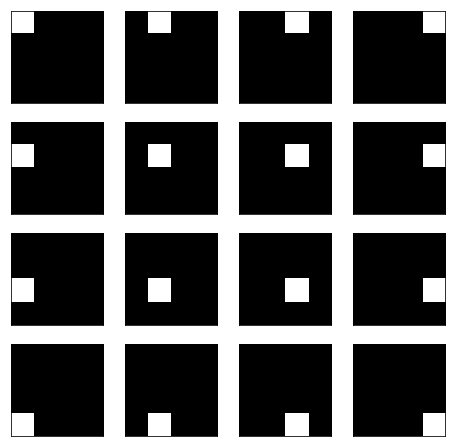

In [9]:
# pip install pywavelets
import pywt
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((32, 32))
        # http://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-decomposition-using-wavedec2
        #coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, mode='per', level=3)
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[0][i, j] = 1.0 # Subband LL4
        # http://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-reconstruction-using-waverec2
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

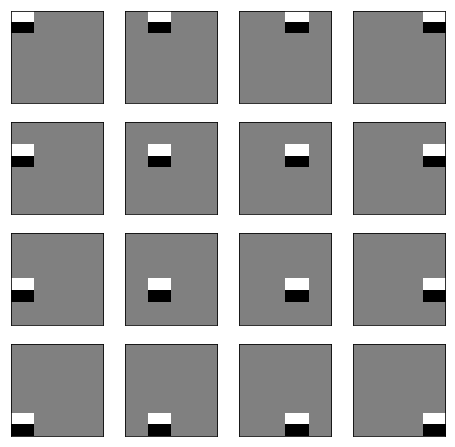

In [10]:
# pip install pywavelets
import pywt
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((32, 32))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][0][i, j] = 1.0 # Subband LH4
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

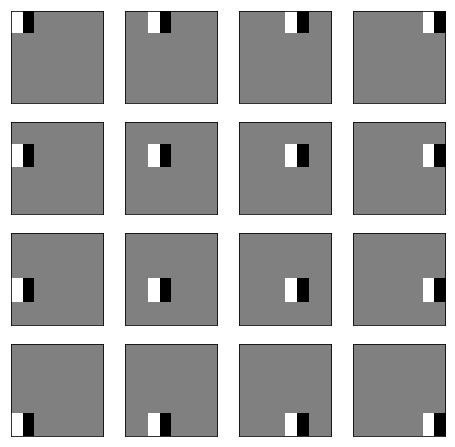

In [11]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((32, 32))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][1][i, j] = 1.0 # Subband HL4
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

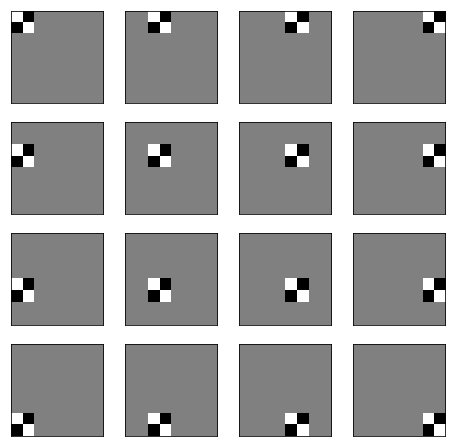

In [12]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((32, 32))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][2][i, j] = 1.0 # Subband HH4
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

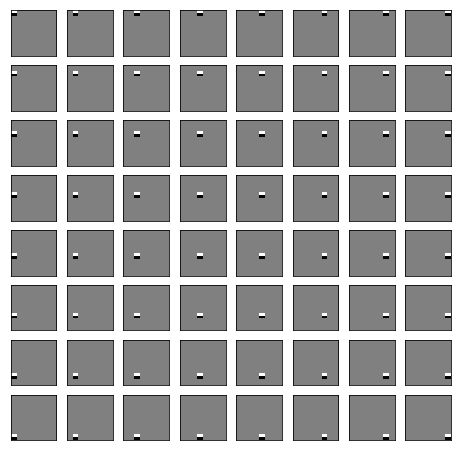

In [13]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(8):
    for j in range(8):

        pixels = np.zeros((32, 32))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[2][0][i, j] = 1.0 # Subband HL3
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(16, 16, 16*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

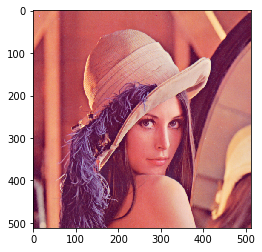

In [14]:
# Load lena

import urllib.request
from matplotlib import pyplot as plt
import numpy as np
import cv2 # pip install opencv-python

%matplotlib inline
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BRG = cv2.imdecode(arr,-1)
pixels = cv2.cvtColor(BRG, cv2.COLOR_BGR2RGB)
plt.imshow(pixels)

In [15]:
# Color 2D-DWT is the 2D-DWT of each component
components = ('r','g','b')
coeffs = [None]*3
wavelet_= 'haar'
levels_ = 5
for i,com in enumerate(components):
    print("{} ".format(i), end='')
    coeffs[i] = pywt.wavedec2(pixels[:,:,i], wavelet=wavelet_, level=levels_)

0 1 2 

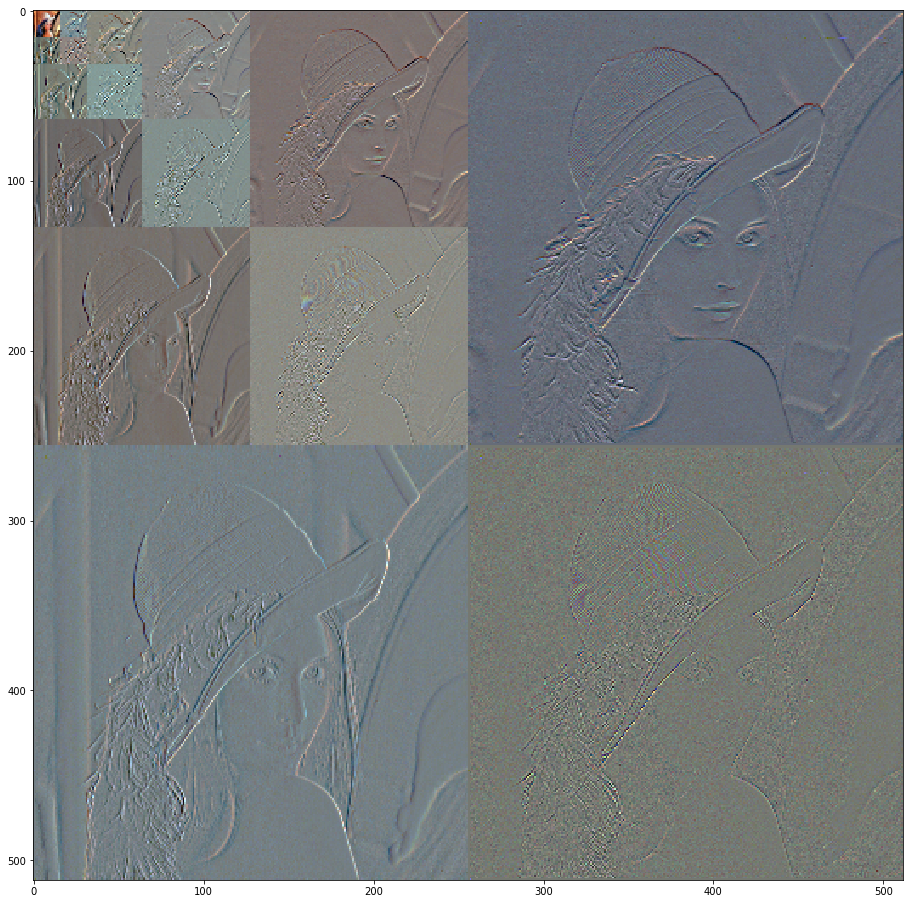

In [16]:
# View DWT coefs

fig = plt.figure(figsize=(16, 16))

view = np.empty(pixels.shape, 'uint8')

# LL subband
for i,com in enumerate(components):
    x = coeffs[i][0][:,:]
    y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
    view[0:coeffs[i][0].shape[0],
         0:coeffs[i][0].shape[1],
         i] = y

for l in range(levels_):

    # LH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][0][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[0:coeffs[i][l+1][0].shape[0],
             coeffs[i][l+1][0].shape[1]:coeffs[i][l+1][0].shape[1]*2,
             i] = y

    # HH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][1][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[coeffs[i][l+1][1].shape[0]:coeffs[i][l+1][1].shape[0]*2,
             0:coeffs[i][l+1][1].shape[1],
             i] = y

    # HH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][2][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[coeffs[i][l+1][2].shape[0]:coeffs[i][l+1][2].shape[0]*2,
             coeffs[i][l+1][2].shape[1]:coeffs[i][l+1][2].shape[1]*2,
             i] = y

plt.subplot(1, 1, 1)
plt.imshow(view)

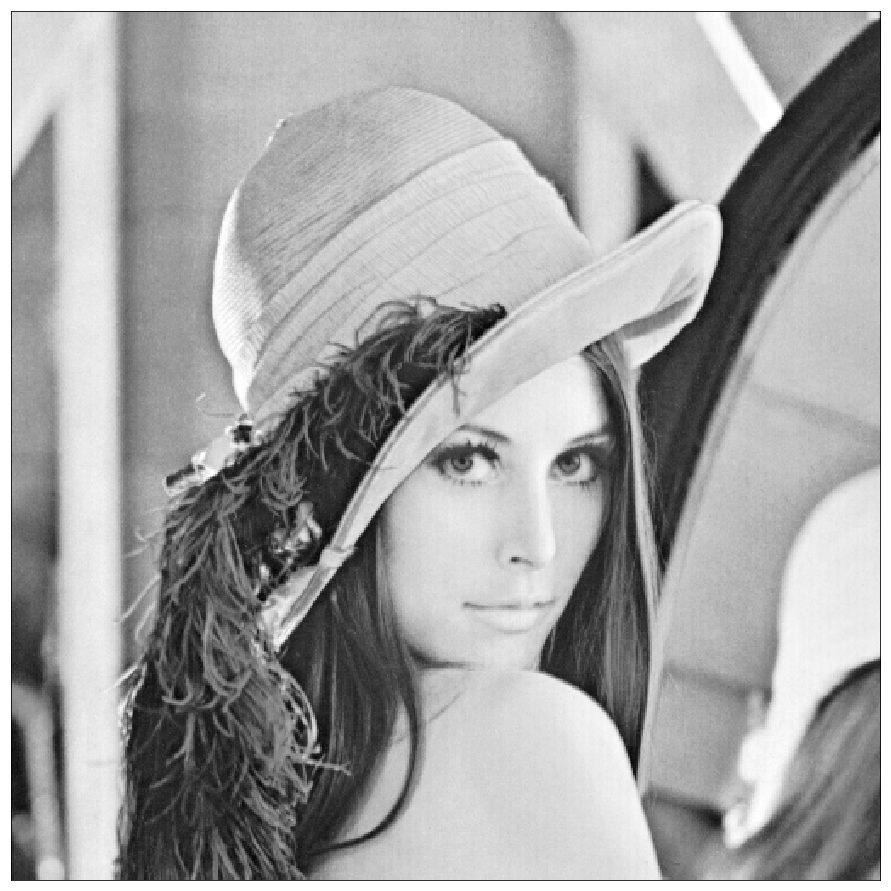

In [17]:
recons_ = pywt.waverec2(coeffs[0], wavelet=wavelet_)
max = recons_.max()
min = recons_.min()
if(max!=min):
    recons = (recons_-min)/(max-min)*255

# Visualize
fig = plt.figure(figsize=(16, 16))

plt.imshow(recons, cmap=plt.cm.gray)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);
plt.show()

255 0


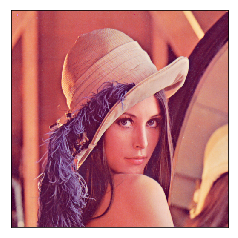

In [18]:
recons = np.empty(pixels.shape)

recons[:,:,0] = pywt.waverec2(coeffs[0], wavelet=wavelet_)
recons[:,:,1] = pywt.waverec2(coeffs[1], wavelet=wavelet_)
recons[:,:,2] = pywt.waverec2(coeffs[2], wavelet=wavelet_)
max = recons.max()
min = recons.min()
if(max!=min):
    recons = ((recons-min)/(max-min)*255).astype('uint8')
                      
# Visualize
print(recons.max(), recons.min())
plt.imshow(recons)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);
plt.show()

### Progressive transmission

100 coefficients

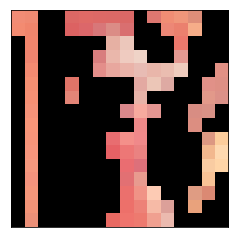

200 coefficients

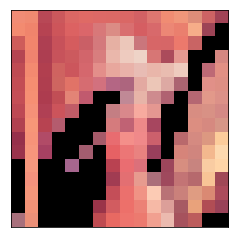

300 coefficients

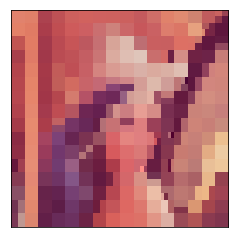

400 coefficients

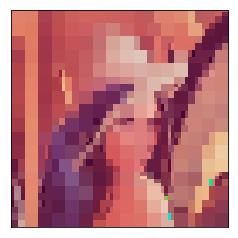

500 coefficients

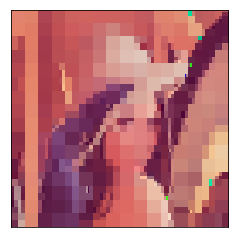

600 coefficients

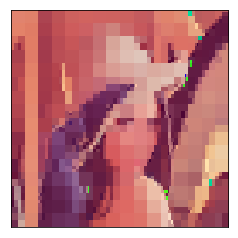

700 coefficients

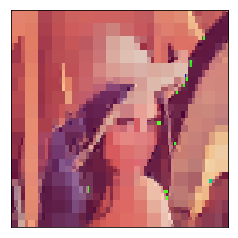

800 coefficients

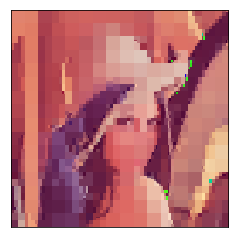

900 coefficients

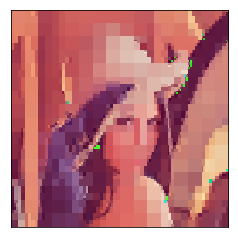

1000 coefficients

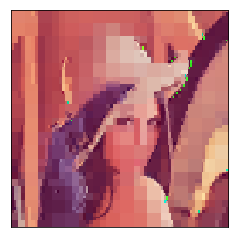

In [19]:
# Reconstruct with biggest DWT coefs
recons = np.empty(pixels.shape)

N = 100 # Step size (in coeffs) for each reconstruction
for k in range(10): # Up to 32 reconstructions

    coeffs_indexes = np.empty((pixels.shape[0] * pixels.shape[1]),
                            dtype='float, int, int, int, int')
                            # Coeff, level, subband, coor_x, coor_y

    # Process only the R component to find the higher coeffs
    
    offset = 0
    
    # LL
    for x in range(coeffs[0][0].shape[0]):
        for y in range(coeffs[0][0].shape[1]):
            coeffs_indexes[offset] = (np.abs(coeffs[0][0][x][y]), 0, 0, x, y)
            offset += 1
    
    # Rest of subbands
    for l in range(levels_):
        for s in range(3):
            for x in range(coeffs[0][l+1][s].shape[0]):
                for y in range(coeffs[0][l+1][s].shape[1]):
                    coeffs_indexes[offset] = (np.abs(coeffs[0][l+1][s][x][y]), (l+1), s, x, y)
                    offset += 1

    sorted = np.zeros((pixels.shape[0] * pixels.shape[1]), dtype='float, int, int, int, int')
    sorted = np.sort(coeffs_indexes)[::-1]

    # Reconstruct R

    # An "empty" transformed structure

    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_)

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[0][0][sorted[kk][3], sorted[kk][4]]
        else:
            #print(kk, sorted[kk][1], sorted[kk][2], sorted[kk][3], sorted[kk][4])
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[0][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]
        
    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_)
    recons[:,:,0] = recons_

    # Reconstruct G

    # An "empty" transformed structure

    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_)

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[1][0][sorted[kk][3], sorted[kk][4]]
        else:
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[1][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]
        
    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_)
    recons[:,:,1] = recons_
    
    # Reconstruct B

    # An "empty" transformed structure
    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_)

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[2][0][sorted[kk][3], sorted[kk][4]]
        else:
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[2][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]

    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_)
    recons[:,:,2] = recons_
                      
    max = recons.max()
    min = recons.min()
    if(max!=min):
        recons = ((recons-min)/(max-min)*255).astype('uint8')

    # Visualize
    plt.imshow(recons)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);
    print("{} coefficients".format((k+1)*N), end='')
    plt.show()

### 5/3 (linear) filters [[Sweldens & Schröder, 2000]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=building+wavelets+at+home&btnG==)

The $i$-th sample of the low-frequency subband (using a filter-bank implementation) is

\begin{equation}
  L_i=-\frac{1}{8}S_{2i-2}+\frac{1}{4}S_{2i-1}+\frac{3}{4}S_{2i}
  +\frac{1}{4}S_{2i+1}-\frac{1}{8}S_{2i+2}
  \tag{5/3L}
  \label{eq:Lineal_A-LPF}
\end{equation}

and the $i$-th sample of the high-frequency signal is computed by

\begin{equation}
  H_i=S_{2i+1}-\frac{S_{2i}+S_{2i+2}}{2},
  \tag{5/3H}
  \label{eq:Lineal_A-HPF}

that, if we use Lifting, it can be also computed using less operations by

\begin{equation}
  L_i=S_{2i}+\frac{H_{i-1}+H_i}{4}.
  \tag{5/3LLifted}
  \label{eq:Lineal_A-LPF_lifting}
\end{equation}

Notice that $H_i=0$ if $S_{2i+1}=(S_{2i}+S_{2i+2})/2$. Therefore, the 5/3 transform is suitable to encode lineally piece-wised signals.

#### 2D basis functions

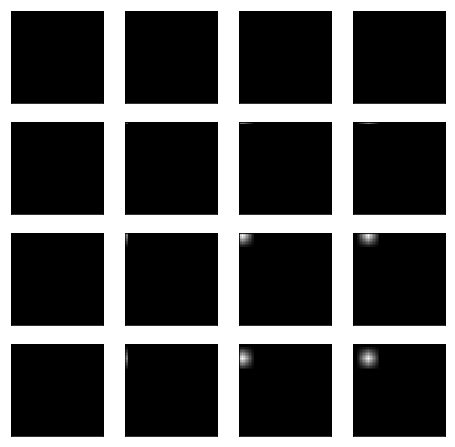

In [20]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'bior2.2'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((64, 64))
        #coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, mode='per', level=3)
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        #print(coeffs[0].shape)
        coeffs[0][i, j] = 1.0
#for i in range(len(coeffs)-1):
    #print(i)
    #coeffs[i+1][0][1, 1] = 1.0
    #coeffs[i+1][1][1, 1] = 1.0
    #coeffs[i+1][2][1, 1] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);
#plt.subplot(1, 1, 1)
#plt.imshow(recons, cmap='gray')

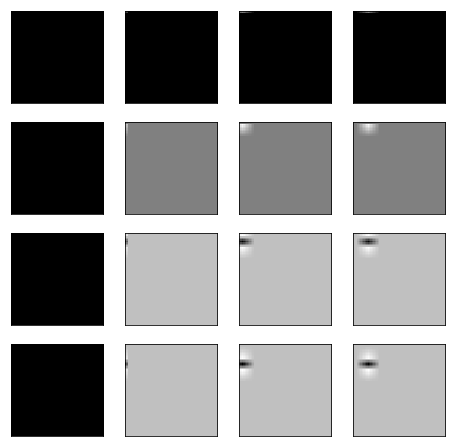

In [21]:
fig = plt.figure(figsize=(16, 16))

for i in range(4):
    for j in range(4):

        pixels = np.zeros((64, 64))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][0][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

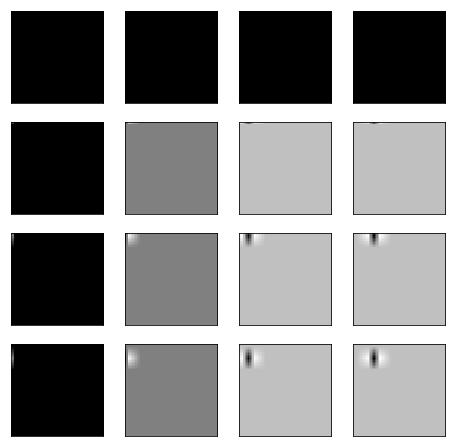

In [22]:
fig = plt.figure(figsize=(16, 16))

for i in range(4):
    for j in range(4):

        pixels = np.zeros((64, 64))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][1][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

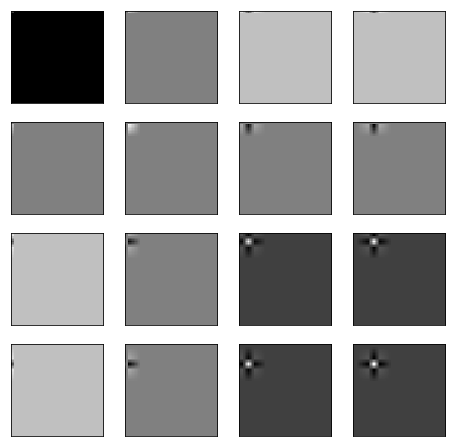

In [23]:
fig = plt.figure(figsize=(16, 16))

for i in range(4):
    for j in range(4):

        pixels = np.zeros((64, 64))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][2][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

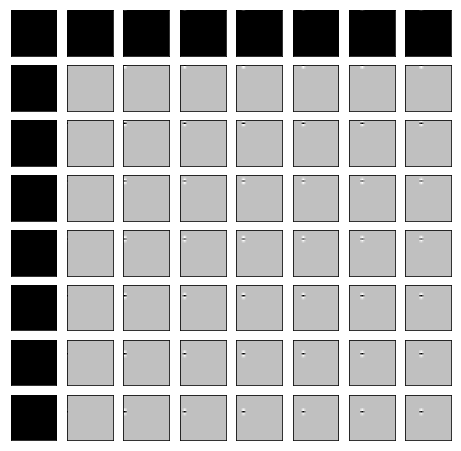

In [24]:
fig = plt.figure(figsize=(16, 16))

for i in range(8):
    for j in range(8):

        pixels = np.zeros((64, 64))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[2][0][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(16, 16, 16*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

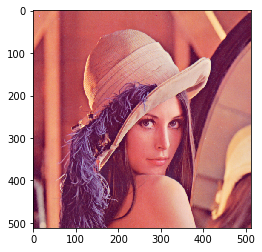

In [25]:
# Load lena

import urllib.request
from matplotlib import pyplot as plt
import numpy as np
import cv2 # pip install opencv-python

%matplotlib inline
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BRG = cv2.imdecode(arr,-1)
pixels = cv2.cvtColor(BRG, cv2.COLOR_BGR2RGB)
plt.imshow(pixels)

In [26]:
# Color 2D-DWT is the 2D-DWT of each component
components = ('r','g','b')
coeffs = [None]*3
wavelet_= 'bior2.2'
levels_ = 5
for i,com in enumerate(components):
    print("{} ".format(i), end='')
    coeffs[i] = pywt.wavedec2(pixels[:,:,i], wavelet=wavelet_, level=levels_, mode='per')

0 1 2 

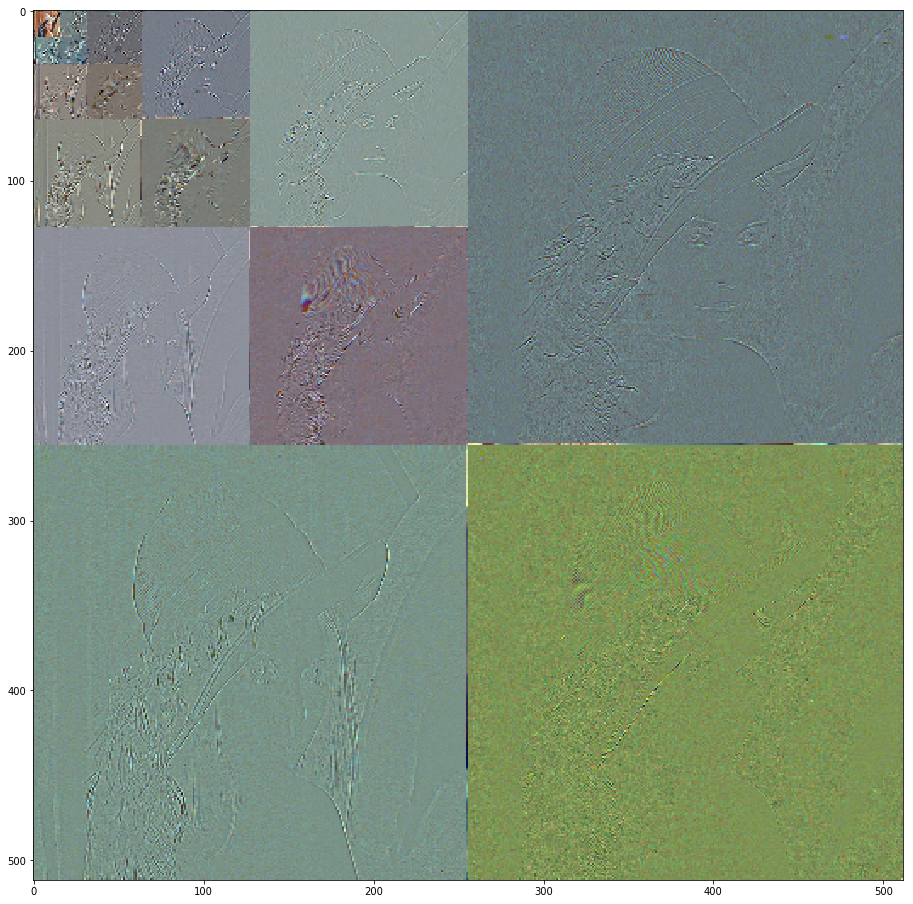

In [27]:
# View DWT coefs

fig = plt.figure(figsize=(16, 16))

view = np.empty(pixels.shape, 'uint8')

# LL subband
for i,com in enumerate(components):
    x = coeffs[i][0][:,:]
    y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
    view[0:coeffs[i][0].shape[0],
         0:coeffs[i][0].shape[1],
         i] = y

for l in range(levels_):

    # LH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][0][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[0:coeffs[i][l+1][0].shape[0],
             coeffs[i][l+1][0].shape[1]:coeffs[i][l+1][0].shape[1]*2,
             i] = y

    # HH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][1][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[coeffs[i][l+1][1].shape[0]:coeffs[i][l+1][1].shape[0]*2,
             0:coeffs[i][l+1][1].shape[1],
             i] = y

    # HH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][2][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[coeffs[i][l+1][2].shape[0]:coeffs[i][l+1][2].shape[0]*2,
             coeffs[i][l+1][2].shape[1]:coeffs[i][l+1][2].shape[1]*2,
             i] = y

plt.subplot(1, 1, 1)
plt.imshow(view)

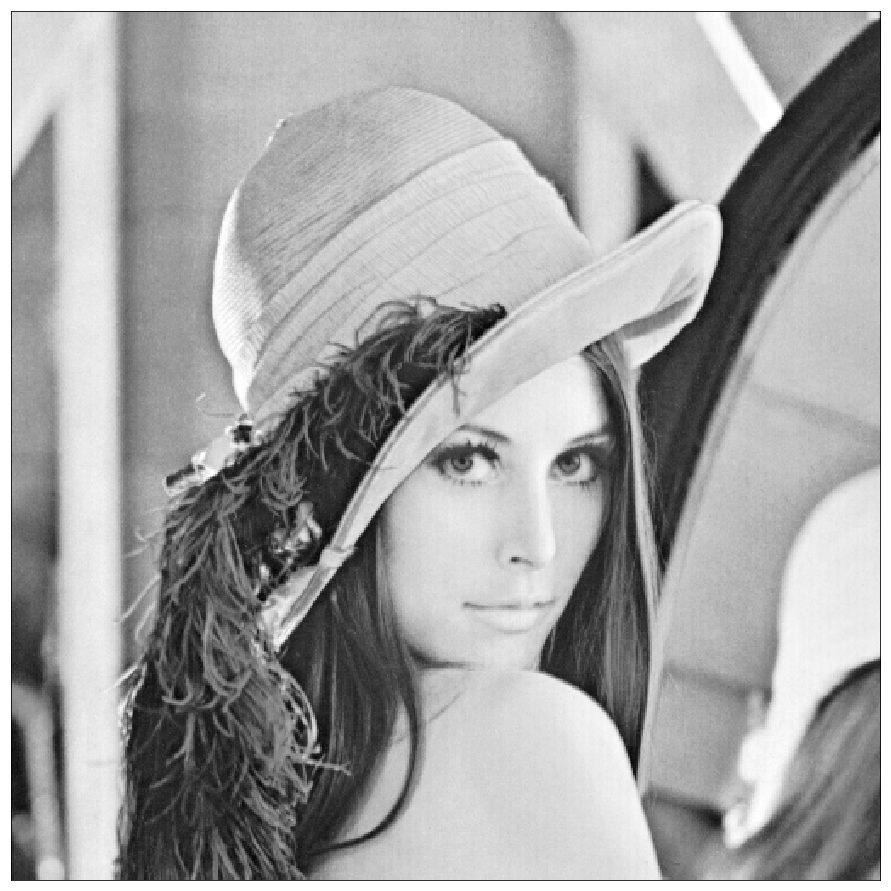

In [28]:
recons_ = pywt.waverec2(coeffs[0], wavelet=wavelet_, mode='per')
max = recons_.max()
min = recons_.min()
if(max!=min):
    recons = (recons_-min)/(max-min)*255

# Visualize
fig = plt.figure(figsize=(16, 16))

plt.imshow(recons, cmap=plt.cm.gray)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);
plt.show()

255 0


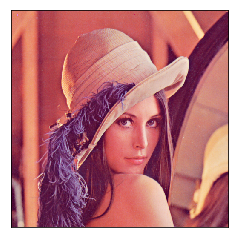

In [29]:
recons = np.empty(pixels.shape)

recons[:,:,0] = pywt.waverec2(coeffs[0], wavelet=wavelet_, mode='per')
recons[:,:,1] = pywt.waverec2(coeffs[1], wavelet=wavelet_, mode='per')
recons[:,:,2] = pywt.waverec2(coeffs[2], wavelet=wavelet_, mode='per')
max = recons.max()
min = recons.min()
if(max!=min):
    recons = ((recons-min)/(max-min)*255).astype('uint8')
                      
# Visualize
print(recons.max(), recons.min())
plt.imshow(recons)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);
plt.show()

### Progressive transmission

100 coefficients

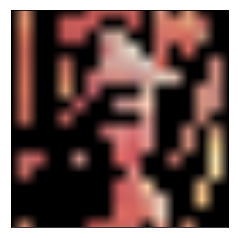

200 coefficients

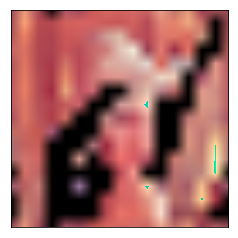

300 coefficients

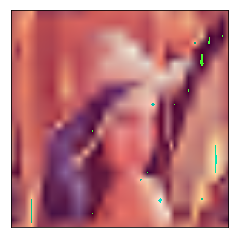

400 coefficients

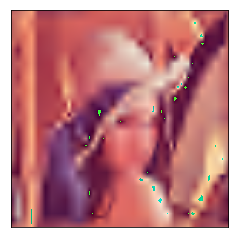

500 coefficients

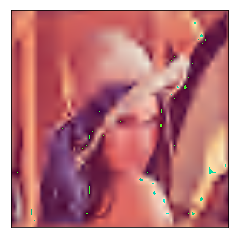

600 coefficients

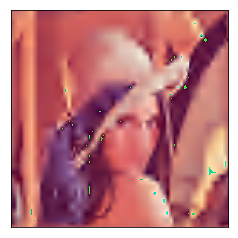

700 coefficients

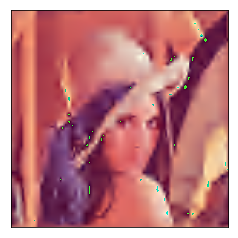

800 coefficients

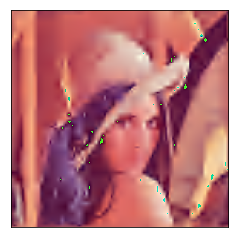

900 coefficients

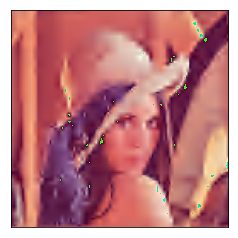

1000 coefficients

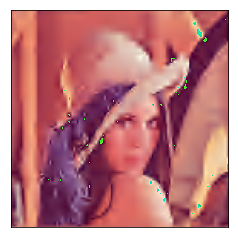

In [30]:
# Reconstruct with biggest DWT coefs
recons = np.empty(pixels.shape)

N = 100 # Step size (in coeffs) for each reconstruction
for k in range(10): # Up to 32 reconstructions

    coeffs_indexes = np.empty((pixels.shape[0] * pixels.shape[1]),
                            dtype='float, int, int, int, int')
                            # Coeff, level, subband, coor_x, coor_y

    # Process only the R component to find the higher coeffs
    
    offset = 0
    
    # LL
    for x in range(coeffs[0][0].shape[0]):
        for y in range(coeffs[0][0].shape[1]):
            coeffs_indexes[offset] = (np.abs(coeffs[0][0][x][y]), 0, 0, x, y)
            offset += 1
    
    # Rest of subbands
    for l in range(levels_):
        for s in range(3):
            for x in range(coeffs[0][l+1][s].shape[0]):
                for y in range(coeffs[0][l+1][s].shape[1]):
                    coeffs_indexes[offset] = (np.abs(coeffs[0][l+1][s][x][y]), (l+1), s, x, y)
                    offset += 1

    sorted = np.zeros((pixels.shape[0] * pixels.shape[1]), dtype='float, int, int, int, int')
    sorted = np.sort(coeffs_indexes)[::-1]

    # Reconstruct R

    # An "empty" transformed structure

    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_, mode='per')

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[0][0][sorted[kk][3], sorted[kk][4]]
        else:
            #print(kk, sorted[kk][1], sorted[kk][2], sorted[kk][3], sorted[kk][4])
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[0][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]
        
    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_, mode='per')
    recons[:,:,0] = recons_

    # Reconstruct G

    # An "empty" transformed structure

    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_, mode='per')

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[1][0][sorted[kk][3], sorted[kk][4]]
        else:
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[1][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]
        
    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_, mode='per')
    recons[:,:,1] = recons_
    
    # Reconstruct B

    # An "empty" transformed structure
    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_, mode='per')

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[2][0][sorted[kk][3], sorted[kk][4]]
        else:
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[2][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]

    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_, mode='per')
    recons[:,:,2] = recons_
                      
    max = recons.max()
    min = recons.min()
    if(max!=min):
        recons = ((recons-min)/(max-min)*255).astype('uint8')

    # Visualize
    plt.imshow(recons)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);
    print("{} coefficients".format((k+1)*N), end='')
    plt.show()

## Quantization in the transform domain

* If the transform is orthogonal, by definition coeffs $S[k]$ are uncorrelated. Therefore, a scalar quantizer can performs an optimal quantization.

## Bit-planes progression<a id='bitplanes_progression'></a>

In [ ]:
!make bit-plane-trans.svg

<img src="figs/bit-plane-trans.svg">

## Bit allocation (bit-rate control)

* In lossless coding, coeffs $S_u$ are directly encoded using some text compression algorithm or a combination of them.

* However, in most situations, a lossy compression is needed and in this case, a transform coder must determine, given a maximum number of bits $\overline{R}$ (which is defined by the compression ratio selected by the user), the number of bits $R(u)$ used by the quantizer for each coeff $S_k$.

## Bit allocation based on minimizing the quantization error

* In unitary transforms, as a consequence of the energy preserving property, an uniform quantization (i.e. the dividing each coeff $S_u$ by the same quantization step) should provide optimal bit allocation if we want to minimize the quantization error (the distortion) in the recostructed signal $s$.

## Bit allocation based on minimizing the variance of the quantization error

* Lets assume that the variance of the coeffs, defined as

  \begin{equation}
    \sigma_{S_u}^2 = \text{E}\big( (S_u - \overline{S})^2\big)
   \end{equation}
   
   (where
   
   \begin{equation}
     \overline{S} = \text{E}(S) = \frac{1}{B}\sum_{u=0}^{B-1} S_u
   \end{equation}
   
  corresponds to the amount of information provided by each coeff. Therefore, coeffs with high variance should be assigned more bits and viceversa.

* Lets define

  <a id='target_bit_average'></a>
  \begin{equation}
    {\overline{R}} = \frac{1}{B}\sum_{u=0}^{B-1}R(u)
    \tag{$\overline{R}$}
  \end{equation}
  
  as the (target) average number of bits/coeff, where $R(u)$ is the number of bits assigned to coeff $S_u$.

* If the mean square error is as a measure of distortion, the variance of the distortion generated by the quantization of a coeff $S_u$ [can be modeled](http://cdn.intechopen.com/pdfs/16267/InTech-Rate_control_in_video_coding.pdf) by

  \begin{equation}
    \sigma_{S_u-\tilde{S}_u}^2=\alpha_{u}2^{-2R(u)}\sigma_{S_u}^2,
  \end{equation}
  
  where $\alpha_{u}$ depends on the frequency $u$ and the quantizer. 

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 500)
plt.plot(x, 2**(-2*x), label=r'$2^{-2R_k}$')
plt.title('R-D curve model')
plt.xlabel('Rate (R)')
plt.ylabel('Distortion (D)')
plt.legend()

* Assuming an additive distorion metric, the total distortion variance for $R_k$ bits/coeff is given by

  \begin{equation}
    D = \sigma_{S-\tilde{S}}^2 = \sum_{u=0}^{B-1} \sigma_{S_u-\tilde{S}_u}^2 = \sum_{u=0}^{B-1}\alpha_u 2^{-2R(u)}\sigma_{S_u}^2 = \alpha\sum_{u=0}^{B-1}2^{-2R(u)}\sigma_{S_u}^2
    \tag{$D$}
  \end{equation},
  
  supposing that $\alpha_u = \alpha$ is constant for all coeffs (a valid supposition for unitary transforms because the quantization error generated in each coeff should be the same if an uniform quantizer is used).
  
* The objective of the bit-allocation process is to find the $\{R(u)\}_{u=0}^{B-1}$ so that minimize $D$ subject to constraint $\overline{R}$:

  \begin{equation}
    \underset{\{R(u)\}_{u=0}^{B-1}}{\operatorname{arg min}} D, \text{s.t.}~{\overline{R}}. 
  \end{equation}

* This is an optimization problem that can be solved using [Lagrange multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier) (note: the following development is not the "standard" way of using Lagrenge multipliear, but it is equivalent).

* Lets define the Lagrangian functional

  \begin{equation}
    J = D - \lambda\Big( \overline{R} - \frac{1}{B}\sum_{u=0}^{B-1}R(u) \Big)= \alpha \sum_{u=0}^{B-1} 2^{-2R(u)}\sigma_{S_u}^2 - \lambda \Big( \overline{R} - \frac{1}{B}\sum_{u=0}^{B-1}R(u) \Big),
  \end{equation}
  
 which taking

  \begin{equation}
    \frac{\partial J}{\partial R(u)} = 0
  \end{equation}
  
 produces that
  
  \begin{equation}
    R(u) = \frac{1}{2}\log_2\big( 2\alpha\ln 2\sigma_{S_u}^2 \big) - \frac{1}{2}\log_2\lambda.
    \tag{$R(u)$}
  \end{equation}
  
* Substituting $R(u)$ in Eq. ($\overline{R}$), we get that

  \begin{equation}
    \overline{R} = \frac{1}{B}\sum_{u=0}^{B-1}\frac{1}{2}\log_2\big( 2\alpha\ln 2\sigma_{S_u}^2 \big) - \frac{1}{2}\log_2\lambda.
  \end{equation}
  
* Operating

  \begin{equation}
    \lambda = \prod_{u=0}^{B-1}\sqrt[B]{2\alpha\ln 2\sigma_{S_u}^2} - 2^{-2\overline{R}}.
  \end{equation}
  
* Substituting $\lambda$ in Eq. ($R(u)$), we obtain the optimal number of bits for each coeff

  \begin{equation}
    R(u) = \overline{R} + \frac{1}{2}\log_2\frac{\sigma_{S_u}^2}{\displaystyle\prod_{u=0}^{B-1}\sqrt[B]{\sigma_{S_u}^2}}.
  \end{equation}
  
  which minimizes the variance of the quantization error. Notice that this value depends proportionally on $\overline{R}$ (the target average bits/coeff), logaritmically on $\sigma_{S_u^2}$ (the variance of the coeff) and log-inversely on the geometric mean of the variances of all coeffs.

## Encoding

* Usually ZigZag-RLE followed by 0-order entropy coding.

## Code-stream orderings and scalabilities<a id='scalabilities'></a>

The order in which the DWT coeﬃents are decoded determines the type of scalability (example with 2 qualities and 3 resolutions):

<img src="figs/orderers-and-scalabilities.svg">

## Interesting links

+ http://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/
+ http://www.scipy-lectures.org/packages/scikit-image/
+ https://www.safaribooksonline.com/library/view/programming-computer-vision/9781449341916/ch01.html